# 1- Model

In [1]:
data_purchase = read.csv("data_purchase_behaviour.csv")
head(data_purchase)

User_ID,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Age_num,Purchase
1003311,M,A,4,0,30,3169
1005583,M,B,2,1,58,20453
1001702,M,C,2,0,23,7053
1001390,M,C,3,1,43,7947
1000048,M,B,3,1,34,5265
1005767,M,B,0,0,33,12748


### First the model with all the parameter

In [2]:
model1 = lm(Purchase~Gender+City_Category+Stay_In_Current_City_Years+Marital_Status+Age_num, data=data_purchase)
summary(model1)


Call:
lm(formula = Purchase ~ Gender + City_Category + Stay_In_Current_City_Years + 
    Marital_Status + Age_num, data = data_purchase)

Residuals:
   Min     1Q Median     3Q    Max 
-10064  -3435  -1180   2910  15436 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8275.000     51.316 161.256  < 2e-16 ***
GenderM                     707.573     29.092  24.322  < 2e-16 ***
City_CategoryB              232.896     31.129   7.482 7.38e-14 ***
City_CategoryC              816.136     33.394  24.440  < 2e-16 ***
Stay_In_Current_City_Years   -2.406      9.745  -0.247 0.804987    
Marital_Status              -44.760     26.760  -1.673 0.094399 .  
Age_num                       3.834      1.127   3.402 0.000669 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5006 on 158993 degrees of freedom
Multiple R-squared:  0.008064,	Adjusted R-squared:  0.008026 
F-statistic: 215.4 on 6 and 15

### We remove the variables Stay_In_Current_City_Years and Marital_Status and we fit the new model

In [3]:
model2 = lm(Purchase~Gender+City_Category+Age_num, data=data_purchase)
summary(model2)


Call:
lm(formula = Purchase ~ Gender + City_Category + Age_num, data = data_purchase)

Residuals:
   Min     1Q Median     3Q    Max 
-10024  -3434  -1181   2910  15437 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8271.658     48.229 171.509  < 2e-16 ***
GenderM         708.019     29.088  24.341  < 2e-16 ***
City_CategoryB  232.321     31.119   7.465 8.34e-14 ***
City_CategoryC  815.757     33.383  24.436  < 2e-16 ***
Age_num           3.274      1.076   3.044  0.00234 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5006 on 158995 degrees of freedom
Multiple R-squared:  0.008046,	Adjusted R-squared:  0.008021 
F-statistic: 322.4 on 4 and 158995 DF,  p-value: < 2.2e-16


# 3- assumptions

### Linear association

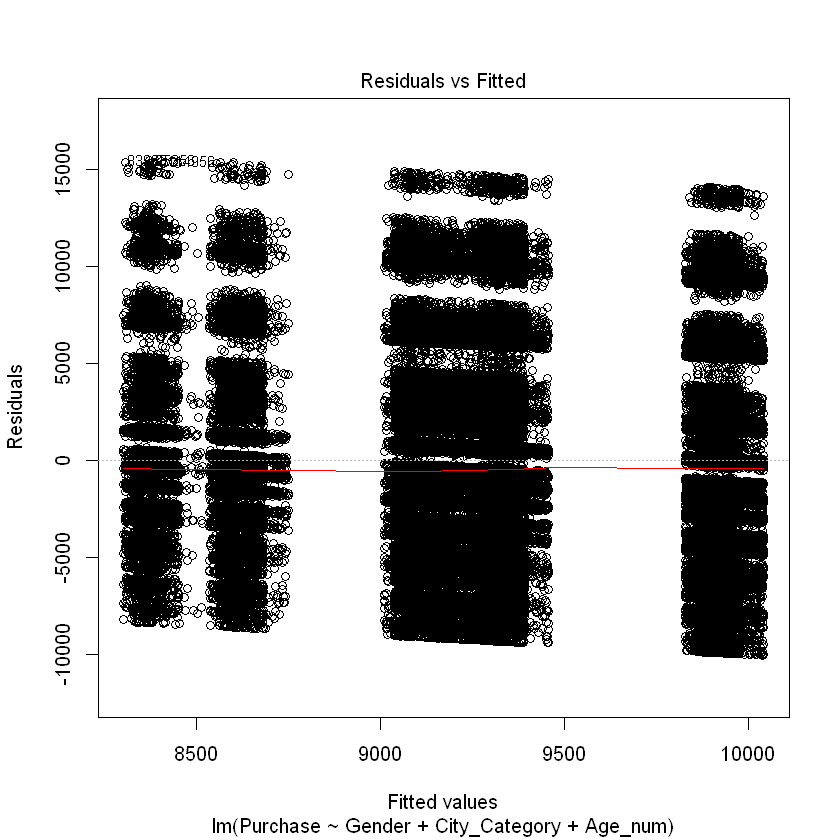

In [4]:
plot(model2,which=1)

### Homoskedasticity

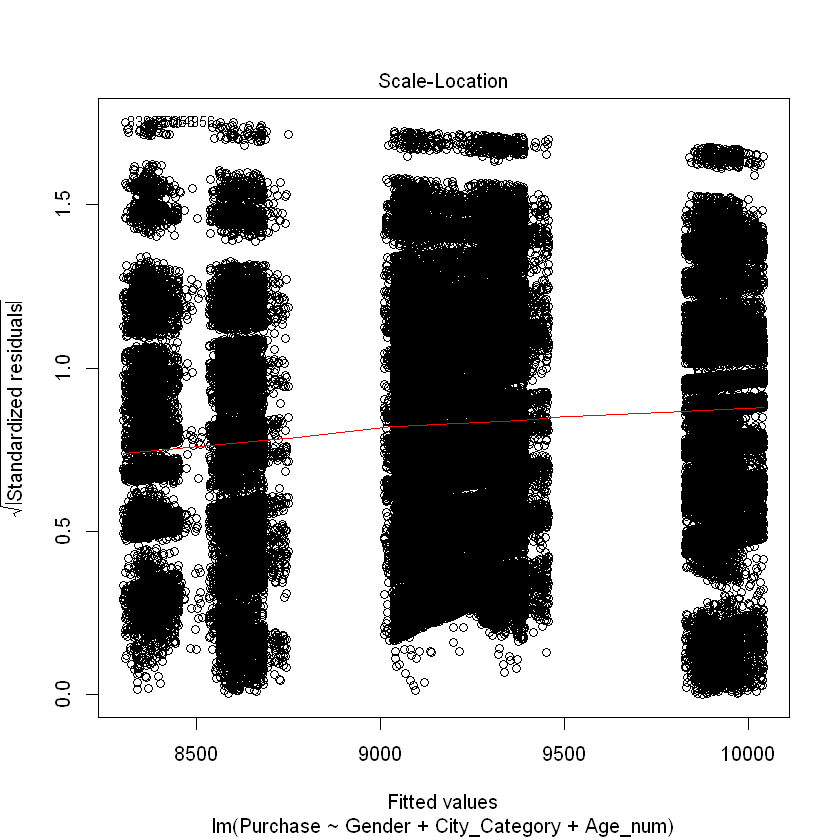

In [5]:
plot(model2,which=3)

### Normality

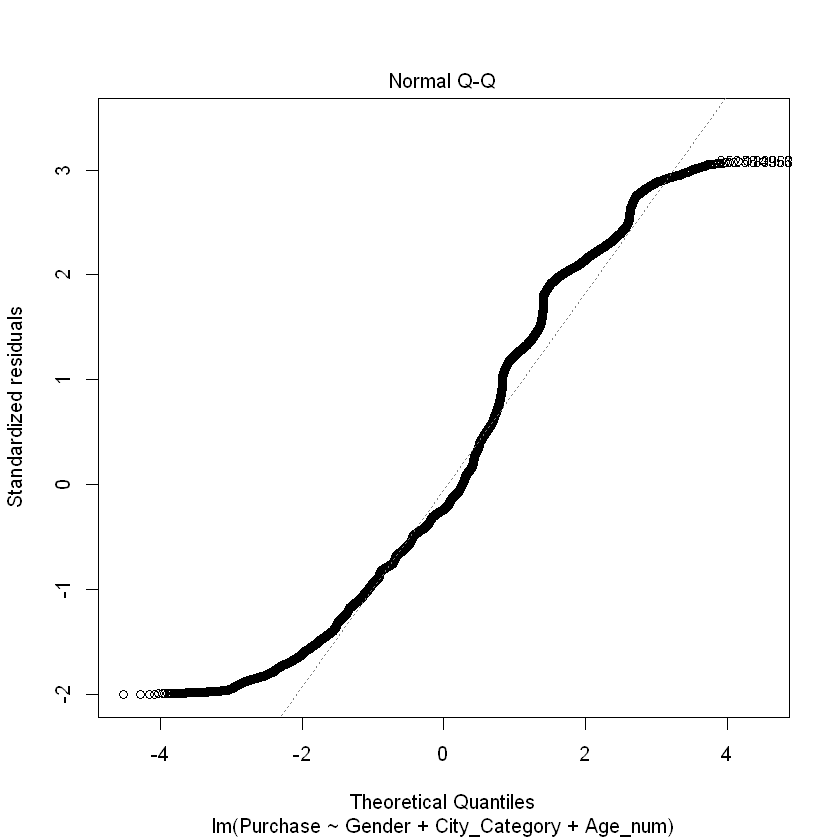

In [6]:
plot(model2,which=2)

# 5- Improve the model 

### Outliers

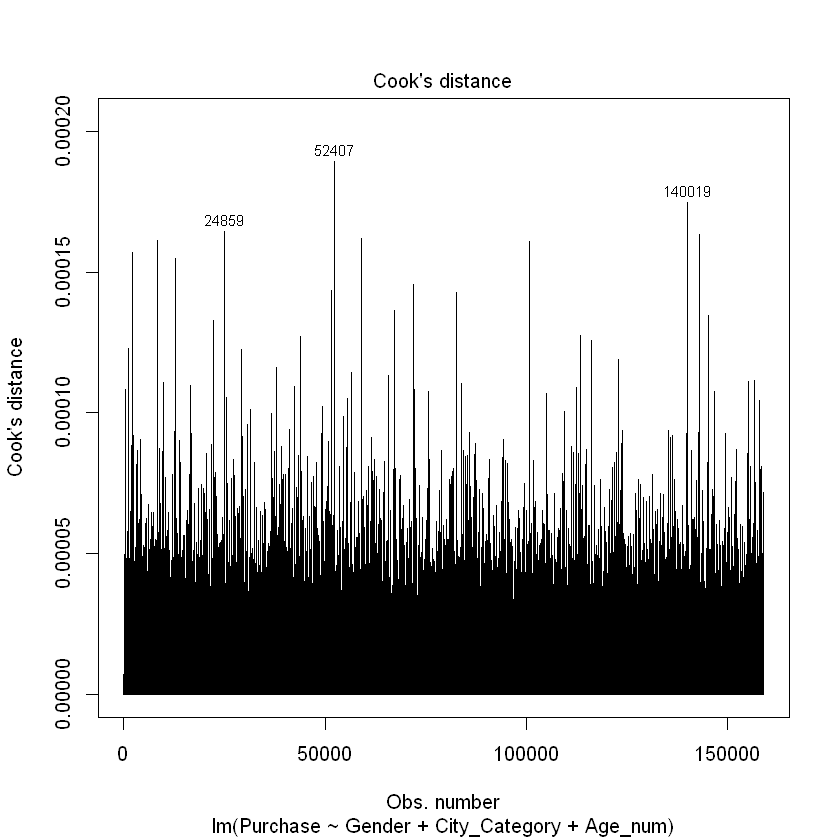

In [7]:
plot(model2,which=4)

### We create a new dataset without the outliers and we fit a new model

In [9]:
temp = boxplot(data_purchase$Purchase, plot=FALSE)$out
data_temp = data_purchase[-which(data_purchase$Purchase %in% temp),]
modeltemp = lm(Purchase~Gender+City_Category+Age_num, data=data_temp)
sqrt(deviance(modeltemp)/df.residual(modeltemp))

[1] 4923.324

### Another way to improve

### Let try to see first the deviance of our first model

In [10]:
deviance(model2)

[1] 3.984905e+12

### Let fit a new model using GLM

In [11]:
modelglm = glm(Purchase~Gender+City_Category+Age_num,family=inverse.gaussian ,data=data_purchase)
summary(modelglm)


Call:
glm(formula = Purchase ~ Gender + City_Category + Age_num, family = inverse.gaussian, 
    data = data_purchase)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.288331  -0.005054  -0.001384   0.002888   0.011847  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.431e-08  1.254e-10 114.169  < 2e-16 ***
GenderM        -1.883e-09  7.772e-11 -24.227  < 2e-16 ***
City_CategoryB -6.294e-10  8.166e-11  -7.707 1.29e-14 ***
City_CategoryC -2.012e-09  8.397e-11 -23.961  < 2e-16 ***
Age_num        -8.129e-12  2.655e-12  -3.061   0.0022 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 3.158661e-05)

    Null deviance: 28.702  on 158999  degrees of freedom
Residual deviance: 28.662  on 158995  degrees of freedom
AIC: 3344875

Number of Fisher Scoring iterations: 6


### The deviance of the new model

In [12]:
deviance(modelglm)

[1] 28.6615

# 6- Comparison of the model

In [13]:
model3 = lm(Purchase~Gender+Age_num, data=data_purchase)
anova(model2,model3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
158995,3.984905e+12,NA,NA,NA,NA
158997,4.001520e+12,-2,-16614528588,331.4542,2.241529e-144
